# **PRE-PROCESSING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn --upgrade



In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve



In [ ]:
pip install scikit-plot


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.size

140000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.describe(include='all')    #T- TO SHOW SUMMARY HORIZONTALLY

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# **INFERENCES**
1.The age of customers ranges from 18 to 92, with a mean value approximately equal to 40.
2.The mean (and median) tenure is 5 years, so the majority of customers are loyal.
3.50% of customers are active.

In [ ]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='IsActiveMember', ylabel='count'>

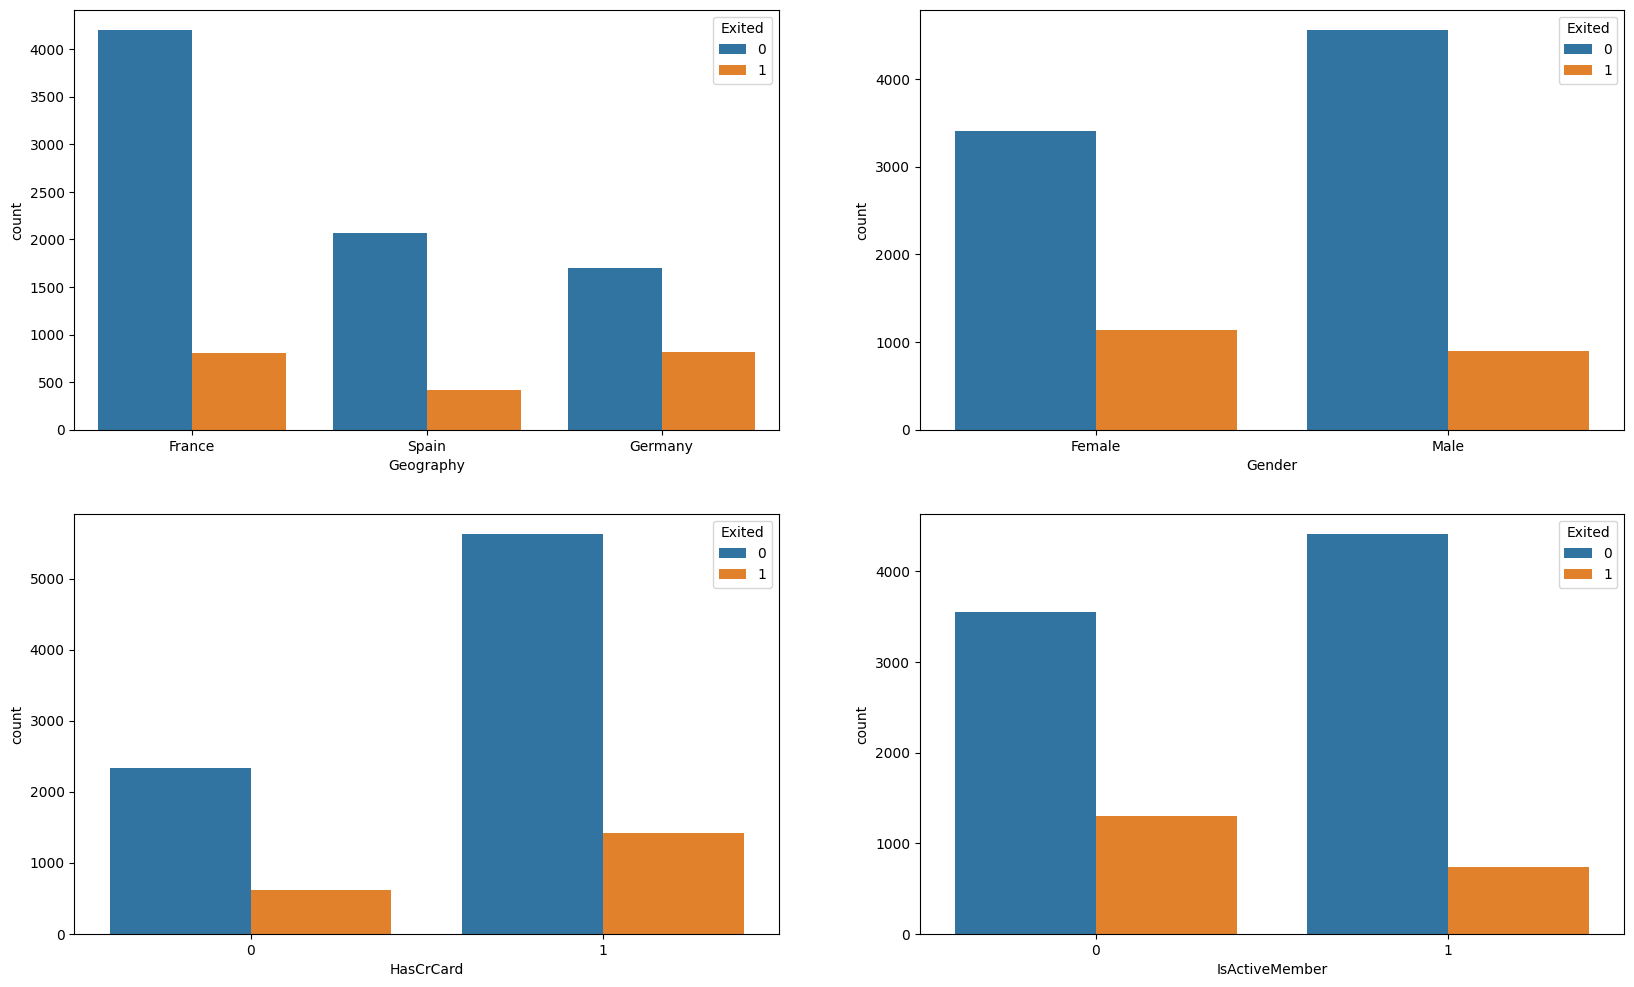

In [ ]:
#plotting for catagorical
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue='Exited', data=data, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=axarr[1][1])


1.The bank has customers in three countries (France, Spain, and Germany). Most customers are in France.

2.There are more male customers than females.

3.A significant majority of customers has a credit card.

4.Almost 50% of customers are not active.

ENODING CATAGORICAL DATA

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
train_data_ = pd.get_dummies(data, columns=['Gender','Geography'])
train_data_.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


# **EDA**

<ipython-input-558-e98f3110a4a9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.2f}% Retained'.format(retained_percentage), '{:.2f}% Churned'.format(churn_percentage)])


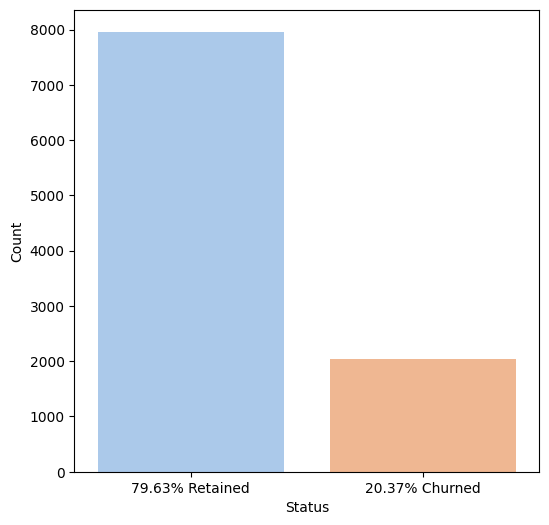

In [ ]:
# since the target variable ("EXITED") IS ENCODED  WHERE (0):NOT CHURNED,(1):CHURNED.

Fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Exited', data=data, palette='pastel' ,ax=ax)
total_samples = len(data)
churn_percentage = (data['Exited'].sum() / total_samples) * 100
retained_percentage = 100 - churn_percentage

ax.set_xticklabels(['{:.2f}% Retained'.format(retained_percentage), '{:.2f}% Churned'.format(churn_percentage)])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
plt.show()

The dataset is imbalanced because a large majority (80%) of clients are retained, making the 'Churned' class a minority.

In [ ]:
numeric = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('numeric: ', ', '.join(numeric))
print('Categorical: ', ', '.join(categorical))

numeric:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


<Figure size 1200x1000 with 0 Axes>

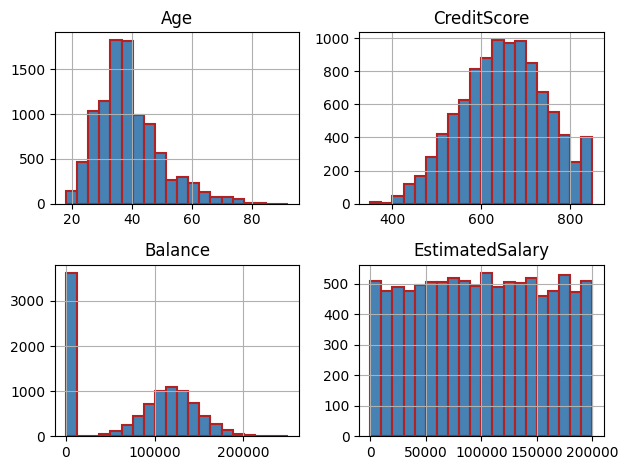

In [ ]:
#plotting all numeric variables:
numeric = data[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]
plt.figure(figsize=(12, 10))
numeric.hist(bins=20, color='steelblue', edgecolor='firebrick', linewidth=1.5, layout=(2, 2))
plt.tight_layout()
plt.show()

1.Age :- Slightly Tail-Heavy:Age has a few people who are significantly older than the rest in the dataset.

2.CreditScore - Mostly Above 600:The majority of clients have a credit score above 600.

3.Balance - Fairly Normal Distribution:
ignoring the first group  of data, the remaining balances follow a shape similar to a bell curve, which is typical of many natural phenomena.

4.EstimatedSalary :: Salaries are fairly evenly distributed across the dataset

# **Correlation**

In [ ]:
age_new = data['Age'] > 30
credit_score_new = data['CreditScore'] > 700
balance_new = data['Balance'] > 0
salary_new = data['EstimatedSalary'] < 100000

data_new = data[age_new & credit_score_new & balance_new & salary_new]
#converting to boolean array
correlation_matrix=data_new.corr()

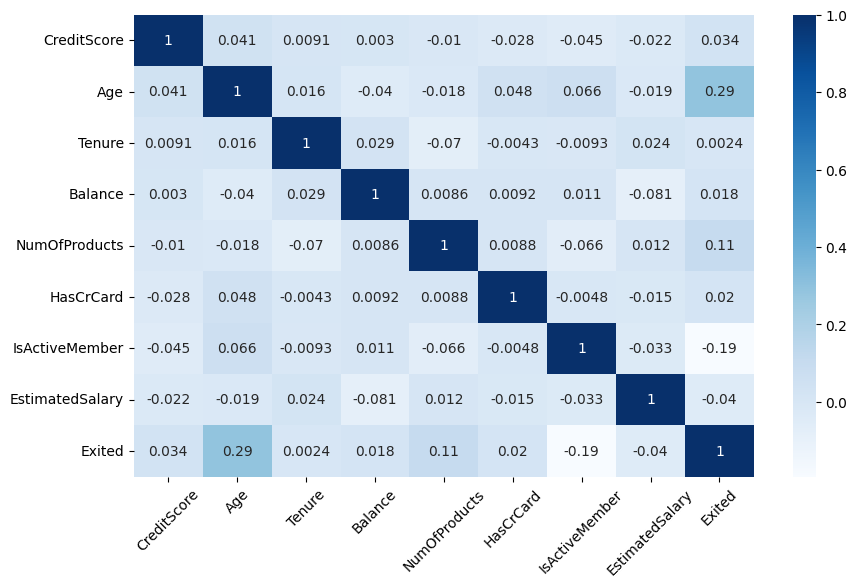

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,  cmap='Blues', xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.xticks(rotation=45)
plt.show()

There is no significant intercorrelation between our features.

In [ ]:
data_churned = data[data['Exited'] == 1]
data_retained = data[data['Exited'] == 0]

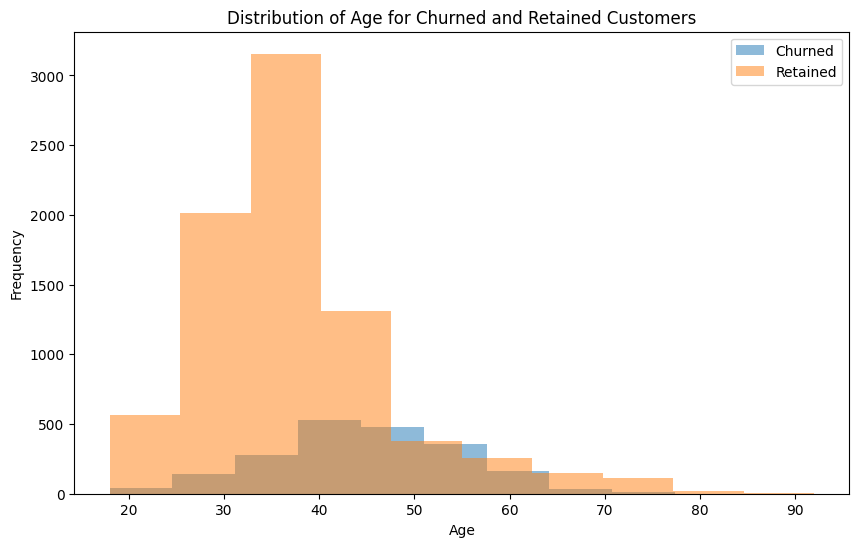

In [ ]:
#comparing age with churn
def plot_numeric(Age):
    plt.figure(figsize=(10, 6))
    plt.hist(data_churned[Age], alpha=0.5, label='Churned')
    plt.hist(data_retained[Age], alpha=0.5, label='Retained')
    plt.xlabel(Age)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {Age} for Churned and Retained Customers')
    plt.show()
plot_numeric('Age')




 Here we see a clear difference between age groups since older customers are more likely to churn,it may be due to bank hasn't adapted its strategy to meet the requirements of older customers.

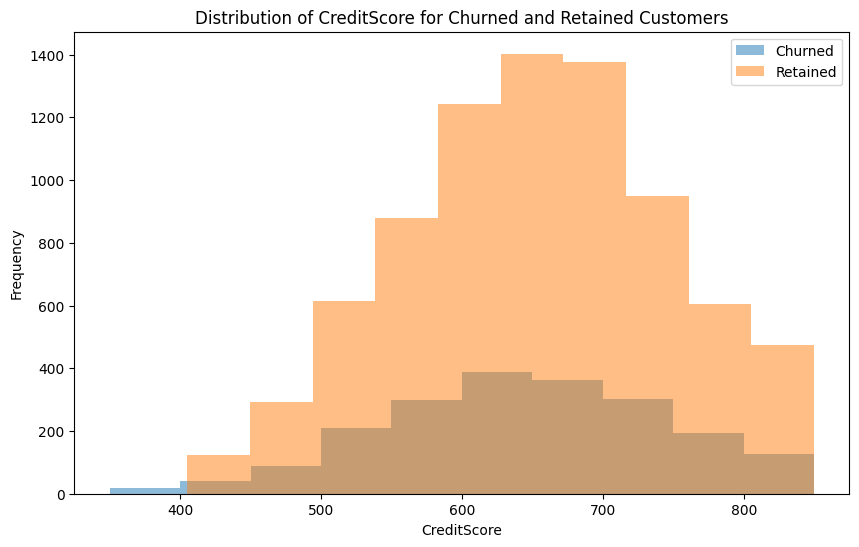

In [ ]:
#checking plot for  credit score
plot_numeric('CreditScore')

There is no significant difference between retained and churned customers in terms of their credit scores.

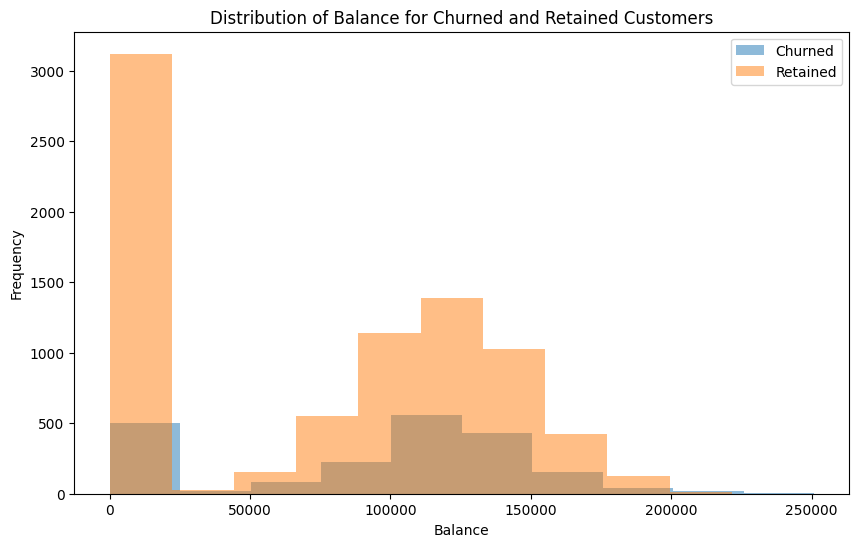

In [ ]:
#checking plot for balance
plot_numeric('Balance')

There is a big percentage of non-churned customers with a low account balance.

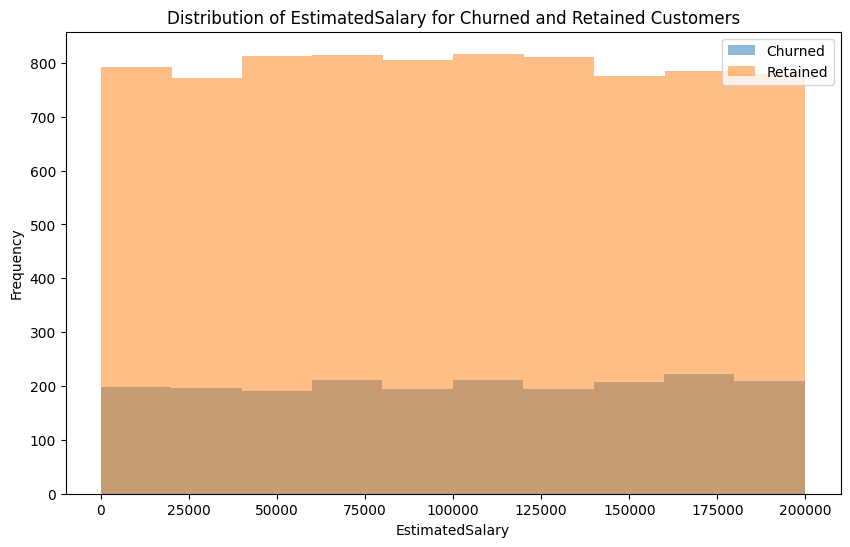

In [ ]:
#checking plot for estimated salary
plot_numeric('EstimatedSalary')

we can conclude that salary doesn't have a significant effect on the likelihood to churn.

# **catagorical variables**

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


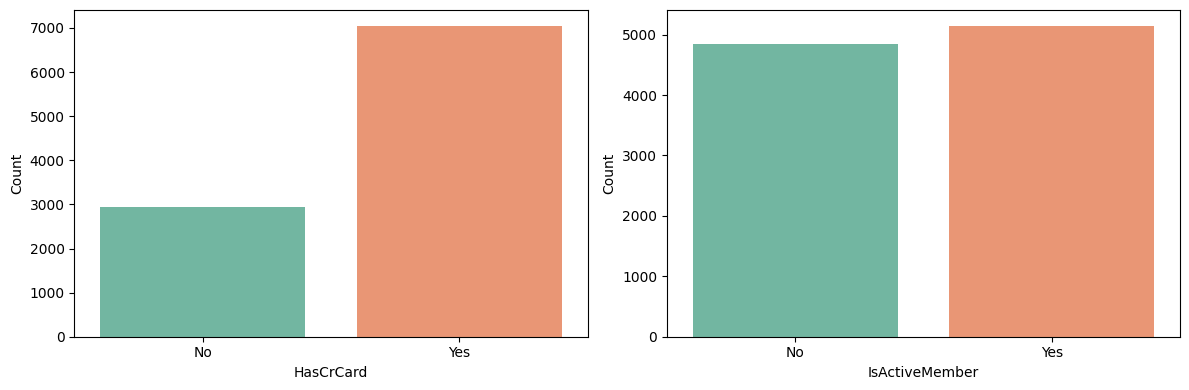

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for index, column in enumerate(['HasCrCard', 'IsActiveMember']):
    plt.subplot(1, 2, index + 1)
    sns.countplot(x=column, data=data, palette="Set2")
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel(column)

plt.tight_layout()



1.A significant majority of customers has a credit card.

2.Almost 50% of customers are not active.

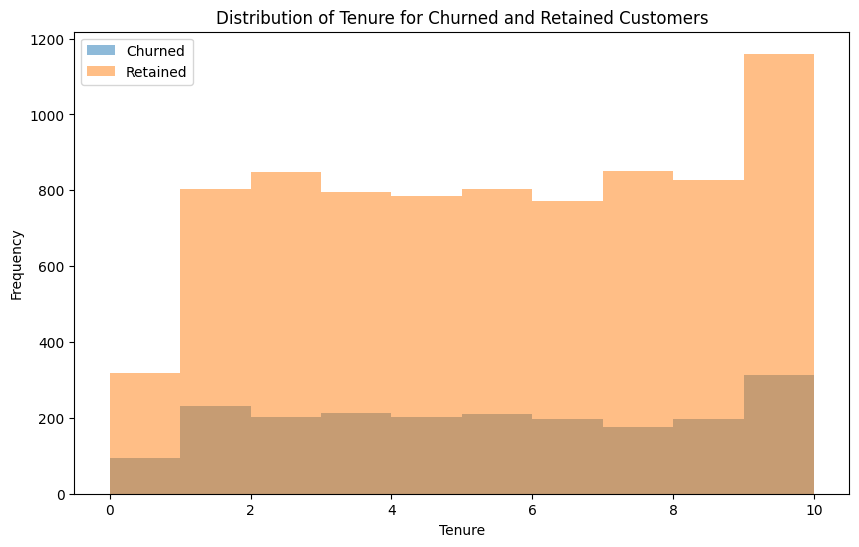

In [ ]:
#plotting for Tenure
def plot_catagorical(Tenure):
    plt.figure(figsize=(10, 6))
    plt.hist(data_churned[Tenure], alpha=0.5, label='Churned')
    plt.hist(data_retained[Tenure], alpha=0.5, label='Retained')
    plt.xlabel(Tenure)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {Tenure} for Churned and Retained Customers')
    plt.show()
plot_catagorical('Tenure')

The number of years (tenure) does not seem to affect the churn rate.

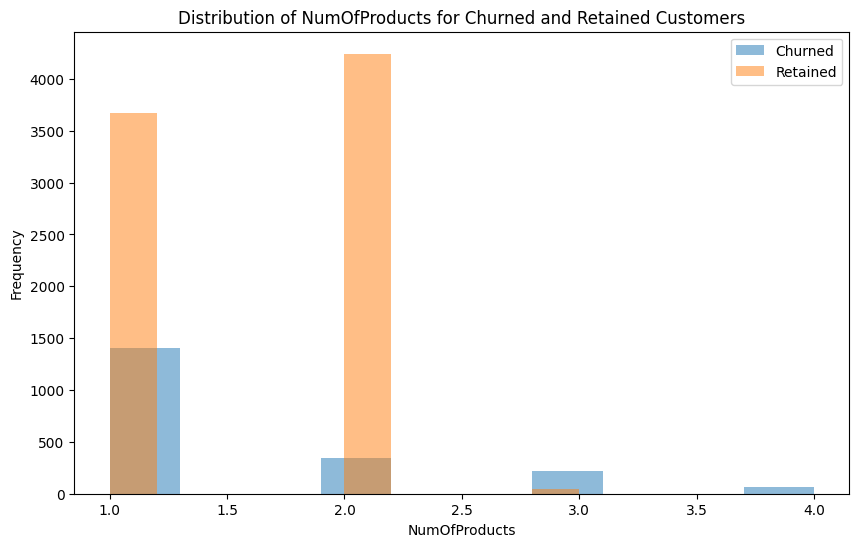

In [ ]:
#plotting for Number of Products
def plot_catagorical(NumOfProducts):
    plt.figure(figsize=(10, 6))
    plt.hist(data_churned[NumOfProducts], alpha=0.5, label='Churned')
    plt.hist(data_retained[NumOfProducts], alpha=0.5, label='Retained')
    plt.xlabel(NumOfProducts)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {NumOfProducts} for Churned and Retained Customers')
    plt.show()
plot_catagorical('NumOfProducts')

Having 3 or 4 products significantly increases the likelihood of churn.
It could potentially mean that the bank cannot properly support customers with more products which in turn increases customer dissatisfaction.

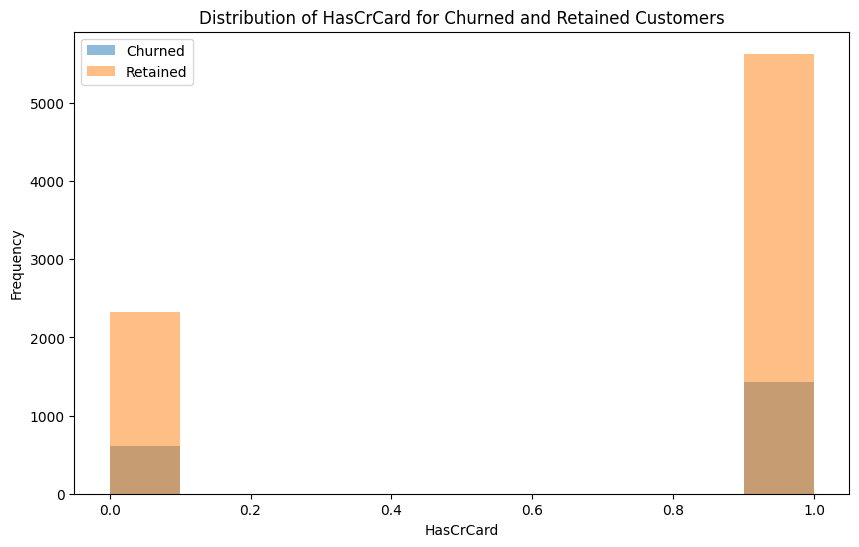

In [ ]:
#plotting for Card Holders
def plot_catagorical(HasCrCard):
    plt.figure(figsize=(10, 6))
    plt.hist(data_churned[HasCrCard], alpha=0.5, label='Churned')
    plt.hist(data_retained[HasCrCard], alpha=0.5, label='Retained')
    plt.xlabel(HasCrCard)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {HasCrCard} for Churned and Retained Customers')
    plt.show()
plot_catagorical('HasCrCard')

Having a credit card does not seem to affect the churn rate.

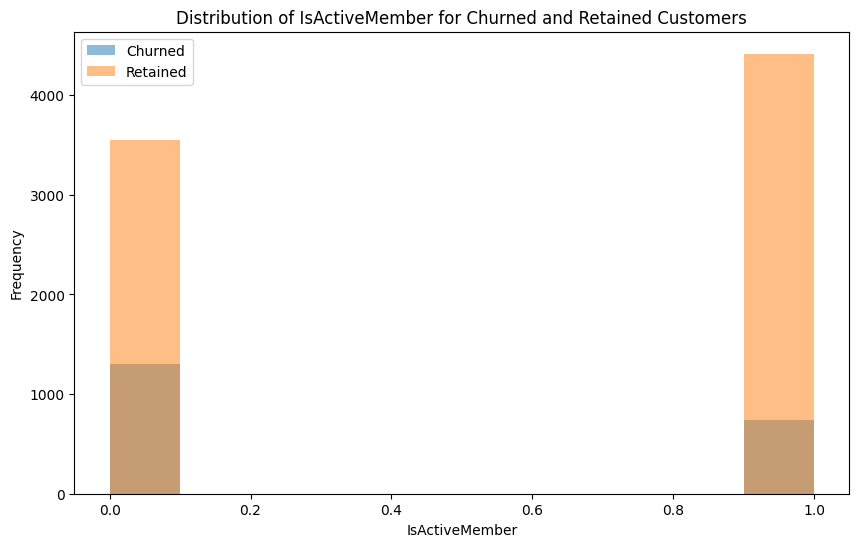

In [ ]:
#plotting for Active Members
def plot_catagorical(IsActiveMember):
    plt.figure(figsize=(10, 6))
    plt.hist(data_churned[IsActiveMember], alpha=0.5, label='Churned')
    plt.hist(data_retained[IsActiveMember], alpha=0.5, label='Retained')
    plt.xlabel(IsActiveMember)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {IsActiveMember} for Churned and Retained Customers')
    plt.show()
plot_catagorical('IsActiveMember')

A significant portion of the clientele is inactive; therefore, the bank will benefit from changing its policy so that more customers become active.

TRAING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split

train_data_, test_data = train_test_split(train_data_, test_size=0.2, random_state=42)
# Reset the index for both training and testing sets
train_data_.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_data_.shape[0], train_data_.shape[1]))
print('Test set: {} rows x {} columns'.format(test_data.shape[0], test_data.shape[1]))


Train set: 8000 rows x 14 columns
Test set: 2000 rows x 14 columns


In [ ]:
pip install --upgrade joblib


In [ ]:
 !pip install scikit-learn==1.3.2


In [ ]:
!pip install joblib==1.3.2

In [ ]:
train_data_.shape

(8000, 14)

In [ ]:
train_data_.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [ ]:
y_train_.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

In [ ]:
print(X_train_.shape)
print(X_test_scaled.shape)
print(y_train_.shape)
print(y_test.shape)


(8000, 10)
(2000, 13)
(8000,)
(2000,)


In [ ]:
X_train_=train_data_[['Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain']]

In [ ]:
y_train_=train_data_['Exited']

In [ ]:
# Assuming your 'Gender' and 'Geography' columns are already in your DataFrame, you can create the additional columns
data['Gender_Female'] = (data['Gender'] == 'Female').astype(int)
data['Gender_Male'] = (data['Gender'] == 'Male').astype(int)
data['Geography_France'] = (data['Geography'] == 'France').astype(int)
data['Geography_Germany'] = (data['Geography'] == 'Germany').astype(int)
data['Geography_Spain'] = (data['Geography'] == 'Spain').astype(int)


In [ ]:
X_train_features = pd.DataFrame(X_train_, columns=['Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain'])

# Select the corresponding columns from your dataset
features = ['Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain']
X_train_ = X_train_[features]


# Initialize and train the KNeighborsRegressor model
knn_model_ = KNeighborsRegressor(n_neighbors=6)
knn_model_.fit(X_train_, y_train_)

# Save the trained model to a file using joblib
joblib.dump(knn_model_, 'knn_model_.pkl')

print("KNN model has been trained and saved as 'knn_model_.pkl'")

KNN model has been trained and saved as 'knn_model_.pkl'


# **BUILDING MODELS**

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Assuming 'Churn' is the target column, and other columns are features
X = data.drop('Exited', axis=1)
y = data['Exited']

# **Gaussian Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming your features and target variable
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
            'Geography_France', 'Geography_Germany', 'Geography_Spain']

target = 'Exited'


# Extract features (X) and target variable (y)
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predictions = gnb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, predictions))


Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1607
           1       0.56      0.38      0.45       393

    accuracy                           0.82      2000
   macro avg       0.71      0.65      0.67      2000
weighted avg       0.80      0.82      0.81      2000



# **Logistic Regression**

In [ ]:
lr = LogisticRegression()

# Train the classifier on the scaled training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = lr.predict(X_test_scaled)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.811
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

# Train the classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = knn.predict(X_test_scaled)

# Calculate accuracy and display results
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.8325
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1607
           1       0.67      0.29      0.40       393

    accuracy                           0.83      2000
   macro avg       0.76      0.63      0.65      2000
weighted avg       0.81      0.83      0.80      2000



In [ ]:
import pandas as pd
data = {
    'Model': ['KNN', 'Linear Regression', 'Gaussian Naive Bayes'],
    'Accuracy': [0.832, 0.811, 0.82],
    'Precision': [0.6, 0.55, 0.56],
    'Recall': [0.43, 0.20, 0.38],
    'F1-score': [0.50, 0.29, 0.45]
}

comparison_df = pd.DataFrame(data)
print("Comparison of Performance Metrics:")
print(comparison_df)


Comparison of Performance Metrics:
                  Model  Accuracy  Precision  Recall  F1-score
0                   KNN     0.832       0.60    0.43      0.50
1     Linear Regression     0.811       0.55    0.20      0.29
2  Gaussian Naive Bayes     0.820       0.56    0.38      0.45


1.ACCURACY:KNN achieved the highest accuracy among the three models, with a value of 83.2%.

2.KNN has the highest precision (60%) among the models, indicating that when it predicts a customer churn, it is correct 60% of the time.(PREDICTS CORRECTLY).

3.KNN has the highest recall (43%), suggesting it identified 43% of all actual churn cases.

4.KNN has the highest F1-score (50%), indicating a balanced performance between precision and recall.